In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
n = 50      # number of nodes = 2 * n
low = 1
high = 100
max_steps = 10000

In [3]:
adj = np.zeros((2*n,2*n),dtype=int)    # adjacent matrix of graph with 2n nodes
for i in range(2*n):
    for j in range(i+1,2*n):
        r = np.random.randint(low=low,high=high)
        adj[i,j] = r
        adj[j,i] = r

In [4]:
try_times = 10
cost = [[]] * try_times
for t in range(try_times):

    solution = np.concatenate((np.zeros(n),np.ones(n))).astype(int)
    np.random.shuffle(solution)
    part1 = np.nonzero(solution)[0]    # index of part 1
    part0 = np.nonzero(1-solution)[0]
    cost[t] = [adj[part1,:][:,part0].sum()]

    for step in range(max_steps):
        u = np.random.choice(part0)
        v = np.random.choice(part1)
        delta = adj[u,part0].sum() + adj[v,part1].sum() \
                - adj[u,part1].sum() - adj[v,part0].sum() + 2 * adj[u,v]
        if delta < 0:   # update solution
            solution[u] = 1 - solution[u]
            solution[v] = 1 - solution[v]
            part1 = np.nonzero(solution)[0]
            part0 = np.nonzero(1-solution)[0]
            cost[t].append(cost[t][-1] + delta)
        else:
            cost[t].append(cost[t][-1])

In [5]:
try_times = 10
T = 500     # initial temperature
decay_rate = 0.999
cost_sa = [[]] * try_times
for t in range(try_times):

    solution = np.concatenate((np.zeros(n),np.ones(n))).astype(int)
    np.random.shuffle(solution)
    part1 = np.nonzero(solution)[0]    # index of part 1
    part0 = np.nonzero(1-solution)[0]
    cost_sa[t] = [adj[part1,:][:,part0].sum()]

    for step in range(max_steps):
        u = np.random.choice(part0)
        v = np.random.choice(part1)
        delta = adj[u,part0].sum() + adj[v,part1].sum() \
                - adj[u,part1].sum() - adj[v,part0].sum() + 2 * adj[u,v]
        if delta < 0 or np.random.random() < np.exp(-1*delta/T):   # update solution
            solution[u] = 1 - solution[u]
            solution[v] = 1 - solution[v]
            part1 = np.nonzero(solution)[0]
            part0 = np.nonzero(1-solution)[0]
            cost_sa[t].append(cost_sa[t][-1] + delta)
            T *= decay_rate
        else:
            cost_sa[t].append(cost_sa[t][-1])
            T *= decay_rate

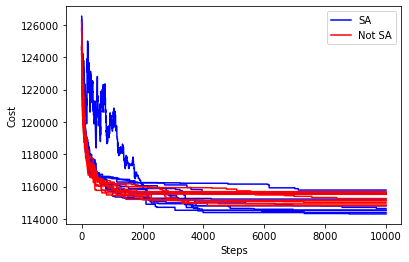

In [7]:
plt.figure()
for t in range(try_times):
    l1, = plt.plot(cost_sa[t],'b')
for t in range(try_times):
    l2, = plt.plot(cost[t],'r')
plt.legend(handles=[l1,l2], labels=['SA','Not SA'])
plt.xlabel("Steps")
plt.ylabel("Cost")
plt.savefig("./figs/graph_partition_"+str(2*n))